In [1]:
#Libraries

import numpy as np
from scipy.stats import randint
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,r2_score

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

plt.rcParams['figure.figsize'] = 25, 10

from sklearn.model_selection import KFold

Using TensorFlow backend.


In [2]:
# data

data = pd.read_csv("..\data\household_power_consumption.txt", sep = ';', parse_dates = {'Datetime' : ['Date', 'Time']}, 
                   infer_datetime_format = True, low_memory = False, na_values = ['nan', '?'], index_col='Datetime')

#Attribute Information: 

#1.date: Date in format dd/mm/yyyy
#2.time: time in format hh:mm:ss
#3.global_active_power: household global minute-averaged active power (in kilowatt)
#4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
#5.voltage: minute-averaged voltage (in volt)
#6.global_intensity: household global minute-averaged current intensity (in ampere)
#7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, 
#containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
#8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, 
#containing a washing-machine, a tumble-drier, a refrigerator and a light.
#9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
# Preprocessing

valoresDesconocidos = data.isna().sum()
valoresNulos = data.isnull().sum()
print('Nan values:')
print(valoresDesconocidos)
print('********************')
print('Null values:')
print(valoresNulos)

# Reemplazo los Nan values por la media de cada columna.
for j in range(1,7):        
        data.iloc[:,j]=data.iloc[:,j].fillna(data.iloc[:,j].mean())

Nan values:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
********************
Null values:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


Distribution.
_____________


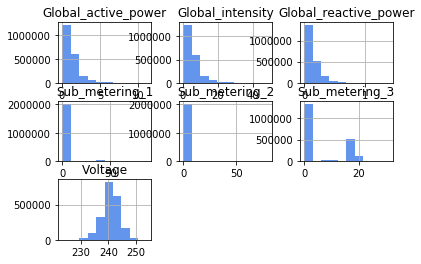

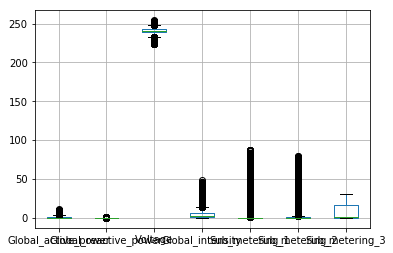

Correlation between variables.
______________________________
#################################################################################
Without resampling.
#################################################################################


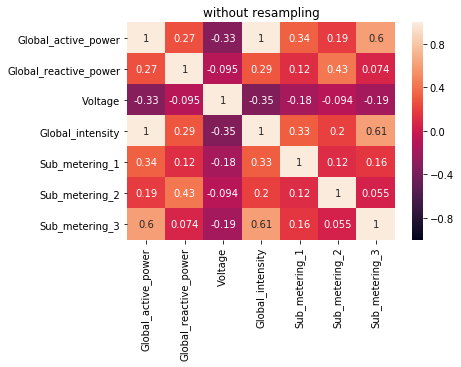

#################################################################################
Over Year.
#################################################################################


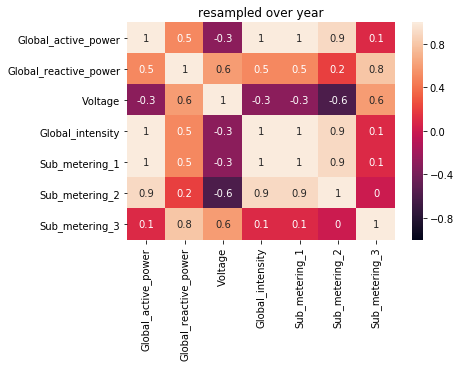

#################################################################################
Over Month.
#################################################################################


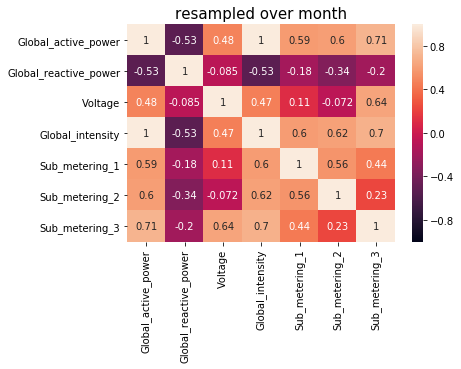

#################################################################################
Over Week.
#################################################################################


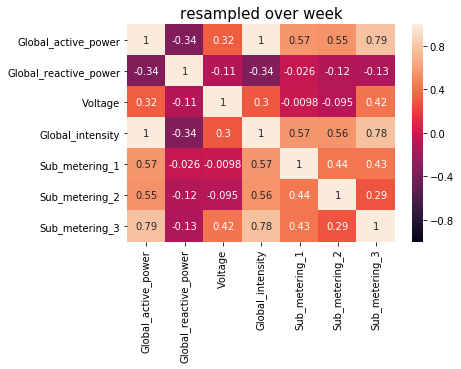

#################################################################################
Over Day.
#################################################################################


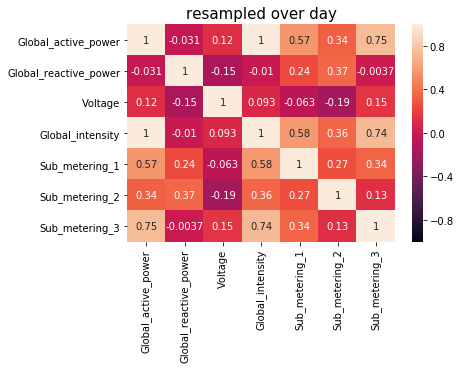

Historic plots.
_______________
#################################################################################
By Year.
#################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


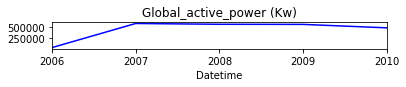

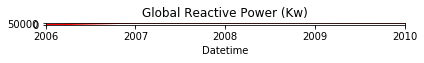

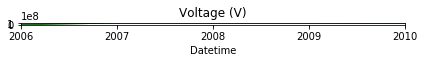

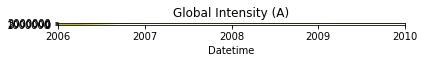

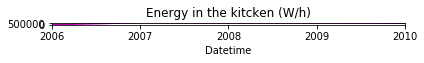

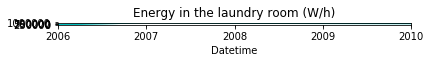

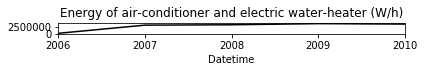

#################################################################################
By Month.
#################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


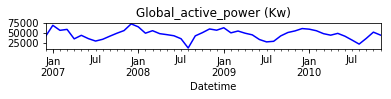

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


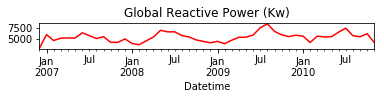

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


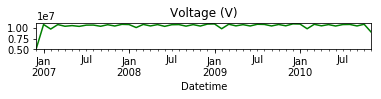

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


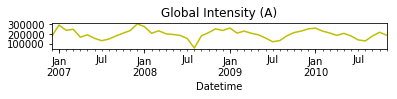

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


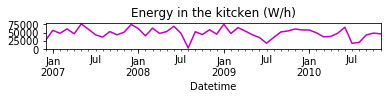

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


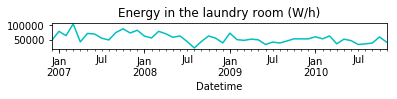

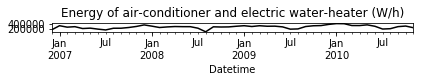

#################################################################################
By Week.
#################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


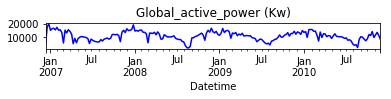

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


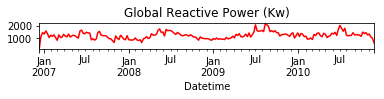

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


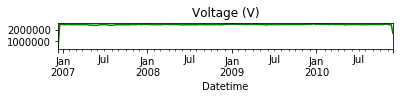

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


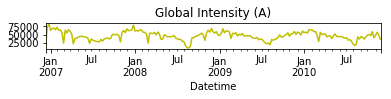

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


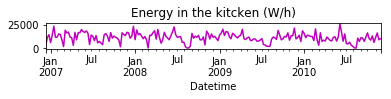

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


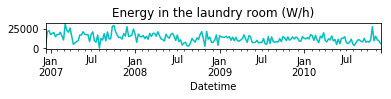

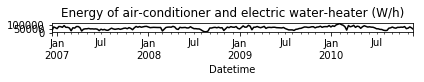

#################################################################################
By Day.
#################################################################################


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


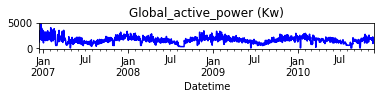

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


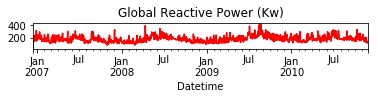

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


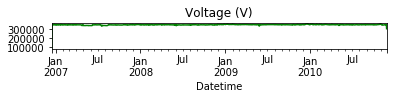

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


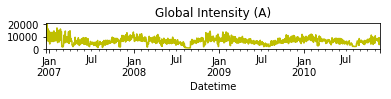

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


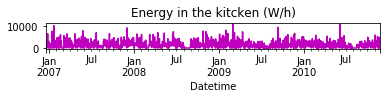

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


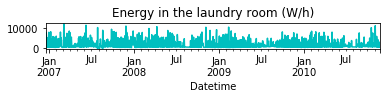

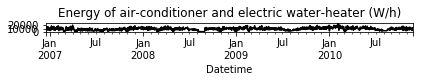

Global Active Power detailed historic plots.
_______________


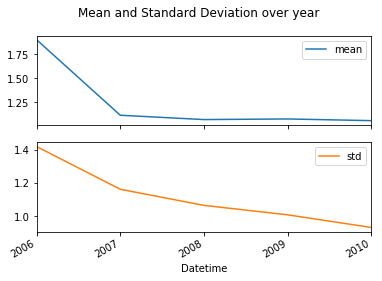

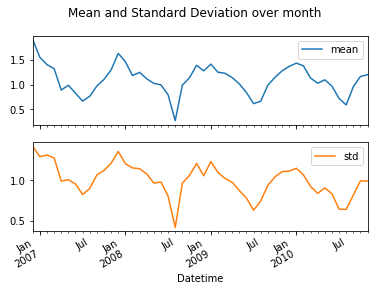

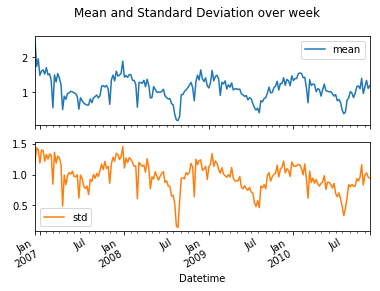

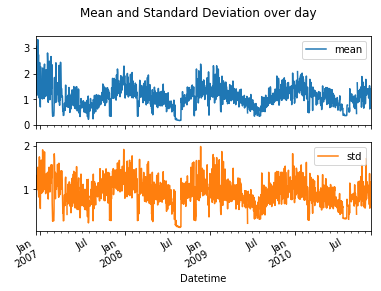

In [4]:
# Data Exploration

class DistributionPlots:
        
    def HistogramPlot(data):
        Histogram = data.hist(color = 'cornflowerblue')
        
    def BoxPlot(data):
        boxPlot = data.boxplot()
        
class CorrelationPlots:
    
    def CorrelationWithoutResampling(data):
        
        sns.heatmap(data.corr(method = 'spearman'), vmax=1, vmin = -1, annot = True)
        plt.title('without resampling')
        plt.show()
        
    def CorrelationOverYear(data):
        
        sns.heatmap(data.resample('Y').mean().corr(method = 'spearman'), vmax = 1, vmin = -1, annot = True)
        plt.title('resampled over year')
        plt.show()

    def CorrelationOverMonth(data):
        
        sns.heatmap(data.resample('M').mean().corr(method = 'spearman'), vmax = 1, vmin = -1, annot = True)
        plt.title('resampled over month', size=15)
        plt.show()
        
    def CorrelationOverWeek(data):
        
        sns.heatmap(data.resample('W').mean().corr(method = 'spearman'), vmax = 1, vmin = -1, annot = True)
        plt.title('resampled over week', size = 15)
        plt.show()
        
    def CorrelationOverDay(data):
        
        sns.heatmap(data.resample('D').mean().corr(method = 'spearman'), vmax = 1, vmin = -1, annot = True)
        plt.title('resampled over day', size = 15)
        plt.show()
        
class HistoricDataPlots:
    
    def PlottingSumByYear(data):
        
        plt.subplot(7,1,1)
        data.Global_active_power.resample('Y').sum().plot(title='Global_active_power (Kw)', color = 'b') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,2)
        data.Global_reactive_power.resample('Y').sum().plot(title='Global Reactive Power (Kw)', color = 'r') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,3)
        data.Voltage.resample('Y').sum().plot(title='Voltage (V)', color = 'g') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,4)
        data.Global_intensity.resample('Y').sum().plot(title='Global Intensity (A)', color = 'y') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,5)
        data.Sub_metering_1.resample('Y').sum().plot(title='Energy in the kitcken (W/h)', color = 'm') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,6)
        data.Sub_metering_2.resample('Y').sum().plot(title='Energy in the laundry room (W/h)', color = 'c') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,7)
        data.Sub_metering_3.resample('Y').sum().plot(title='Energy of air-conditioner and electric water-heater (W/h)', color = 'k') 
        plt.tight_layout()
        plt.show()
        
    def PlottingSumByMonth(data):
        
        plt.subplot(7,1,1)
        data.Global_active_power.resample('M').sum().plot(title='Global_active_power (Kw)', color = 'b') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,2)
        data.Global_reactive_power.resample('M').sum().plot(title='Global Reactive Power (Kw)', color = 'r') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,3)
        data.Voltage.resample('M').sum().plot(title='Voltage (V)', color = 'g') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,4)
        data.Global_intensity.resample('M').sum().plot(title='Global Intensity (A)', color = 'y') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,5)
        data.Sub_metering_1.resample('M').sum().plot(title='Energy in the kitcken (W/h)', color = 'm') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,6)
        data.Sub_metering_2.resample('M').sum().plot(title='Energy in the laundry room (W/h)', color = 'c') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,7)
        data.Sub_metering_3.resample('M').sum().plot(title='Energy of air-conditioner and electric water-heater (W/h)', color = 'k') 
        plt.tight_layout()
        plt.show()
        
    def PlottingSumByWeek(data):
        
        plt.subplot(7,1,1)
        data.Global_active_power.resample('W').sum().plot(title='Global_active_power (Kw)', color = 'b') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,2)
        data.Global_reactive_power.resample('W').sum().plot(title='Global Reactive Power (Kw)', color = 'r') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,3)
        data.Voltage.resample('W').sum().plot(title='Voltage (V)', color = 'g') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,4)
        data.Global_intensity.resample('W').sum().plot(title='Global Intensity (A)', color = 'y') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,5)
        data.Sub_metering_1.resample('W').sum().plot(title='Energy in the kitcken (W/h)', color = 'm') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,6)
        data.Sub_metering_2.resample('W').sum().plot(title='Energy in the laundry room (W/h)', color = 'c') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,7)
        data.Sub_metering_3.resample('W').sum().plot(title='Energy of air-conditioner and electric water-heater (W/h)', color = 'k') 
        plt.tight_layout()
        plt.show()
        
    def PlottingSumByDay(data):
        
        plt.subplot(7,1,1)
        data.Global_active_power.resample('D').sum().plot(title='Global_active_power (Kw)', color = 'b') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,2)
        data.Global_reactive_power.resample('D').sum().plot(title='Global Reactive Power (Kw)', color = 'r') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,3)
        data.Voltage.resample('D').sum().plot(title='Voltage (V)', color = 'g') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,4)
        data.Global_intensity.resample('D').sum().plot(title='Global Intensity (A)', color = 'y') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,5)
        data.Sub_metering_1.resample('D').sum().plot(title='Energy in the kitcken (W/h)', color = 'm') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,6)
        data.Sub_metering_2.resample('D').sum().plot(title='Energy in the laundry room (W/h)', color = 'c') 
        plt.tight_layout()
        plt.show()
        
        plt.subplot(7,1,7)
        data.Sub_metering_3.resample('D').sum().plot(title='Energy of air-conditioner and electric water-heater (W/h)', color = 'k') 
        plt.tight_layout()
        plt.show()

class HistoricGlobalActivePowerPlots:
        
    def PlottingGlobalActivePowerMeanStd(data):

        data.Global_active_power.resample('Y').agg(['mean', 'std']).plot(subplots = True, title='Mean and Standard Deviation over year')
        plt.show()
        
        data.Global_active_power.resample('M').agg(['mean', 'std']).plot(subplots = True, title='Mean and Standard Deviation over month')
        plt.show()
        
        data.Global_active_power.resample('W').agg(['mean', 'std']).plot(subplots = True, title='Mean and Standard Deviation over week')
        plt.show()
        
        data.Global_active_power.resample('D').agg(['mean', 'std']).plot(subplots = True, title='Mean and Standard Deviation over day')
        plt.show()
        
        
print("Distribution.")
print("_____________")

DistributionPlots.HistogramPlot(data)
plt.show()
DistributionPlots.BoxPlot(data)
plt.show()

print("Correlation between variables.")
print("______________________________")

print("#################################################################################")
print("Without resampling.")
print("#################################################################################")

CorrelationPlots.CorrelationWithoutResampling(data)
plt.show()

print("#################################################################################")
print("Over Year.")
print("#################################################################################")

CorrelationPlots.CorrelationOverYear(data)
plt.show()

print("#################################################################################")
print("Over Month.")
print("#################################################################################")

CorrelationPlots.CorrelationOverMonth(data)
plt.show()

print("#################################################################################")
print("Over Week.")
print("#################################################################################")

CorrelationPlots.CorrelationOverWeek(data)
plt.show()

print("#################################################################################")
print("Over Day.")
print("#################################################################################")

CorrelationPlots.CorrelationOverDay(data)
plt.show()

print("Historic plots.")
print("_______________")

print("#################################################################################")
print("By Year.")
print("#################################################################################")

HistoricDataPlots.PlottingSumByYear(data)
plt.show()

print("#################################################################################")
print("By Month.")
print("#################################################################################")

HistoricDataPlots.PlottingSumByMonth(data)
plt.show()

print("#################################################################################")
print("By Week.")
print("#################################################################################")

HistoricDataPlots.PlottingSumByWeek(data)
plt.show()

print("#################################################################################")
print("By Day.")
print("#################################################################################")

HistoricDataPlots.PlottingSumByDay(data)
plt.show()

print("Global Active Power detailed historic plots.")
print("_______________")

HistoricGlobalActivePowerPlots.PlottingGlobalActivePowerMeanStd(data)
plt.show()

In [9]:
# Feature Engineering

def seriesToSupervised(data, n_in = 1, n_out = 1, dropnan=True):
    
	numberOfVariables = 1 if type(data) is list else data.shape[1]
	dataTuned = pd.DataFrame(data)
	Columns, Names = list(), list()
	
	for i in range(n_in, 0, -1):
		Columns.append(dataTuned.shift(i))
		Names += [('var%d(t-%d)' % (j+1, i)) for j in range(numberOfVariables)]
	
	for i in range(0, n_out):
		Columns.append(dataTuned.shift(-i))
		if i == 0:
			Names += [('var%d(t)' % (j+1)) for j in range(numberOfVariables)]
		else:
			Names += [('var%d(t+%d)' % (j+1, i)) for j in range(numberOfVariables)]
	
	dataAggregated = pd.concat(Columns, axis=1)
	dataAggregated.columns = Names
	
	if dropnan:
		dataAggregated.dropna(inplace = True)
	return dataAggregated

dataResampledToHours = data.resample('h').mean() 
valuesOfdataResampledToHours = dataResampledToHours.values 
#valuesWithoutResampling = data.values

Values = valuesOfdataResampledToHours

Scaler = MinMaxScaler(feature_range=(0, 1))
#Scaler = StandardScaler(feature_range=(0, 1))
Scaled = Scaler.fit_transform(Values)

Reframed = seriesToSupervised(Scaled, 1, 1)

Reframed.drop(Reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)

Values = Reframed.values

#trainingTime = 365*24*60
trainingTime = 365*24
Train = Values[:trainingTime, :]
Test = Values[trainingTime:, :]

xTrain, yTrain = Train[:, :-1], Train[:, -1]
xTest, yTest = Test[:, :-1], Test[:, -1]

xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 8760 samples, validate on 25399 samples
Epoch 1/20
 - 1s - loss: 0.0199 - val_loss: 0.0125
Epoch 2/20
 - 1s - loss: 0.0124 - val_loss: 0.0109
Epoch 3/20
 - 1s - loss: 0.0113 - val_loss: 0.0099
Epoch 4/20
 - 1s - loss: 0.0108 - val_loss: 0.0095
Epoch 5/20
 - 1s - loss: 0.0106 - val_loss: 0.0094
Epoch 6/20
 - 1s - loss: 0.0105 - val_loss: 0.0094
Epoch 7/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 8/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 9/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 10/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 11/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 12/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 13/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 14/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 15/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 16/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 17

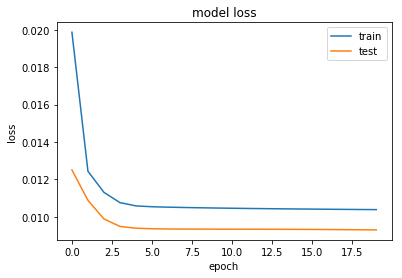

Test RMSE: 0.096


In [6]:
# Model

dropoutIndex = 0.0
neuronsLSTMLayer = 100
neuronsOutputLayer = 1
lossFunction = 'mean_squared_error'
Optimizer = 'adam'
Epochs = 20
batchSize = 70
Verbose = 2

model = Sequential()
model.add(LSTM(neuronsLSTMLayer, input_shape = (xTrain.shape[1], xTrain.shape[2])))
model.add(Dropout(dropoutIndex))
model.add(Dense(neuronsOutputLayer))
model.compile(loss = lossFunction, optimizer = Optimizer)

history = model.fit(xTrain, yTrain, epochs = Epochs, batch_size = batchSize, validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

yPred = model.predict(xTest)
xTest = xTest.reshape((xTest.shape[0], 7))

yPredInverse = np.concatenate((yPred, xTest[:, -6:]), axis = 1)

yPredInverse = Scaler.fit_transform(yPredInverse)
yPredInverse = Scaler.inverse_transform(yPredInverse)
yPredInverse = yPredInverse[:,0]

yTest = yTest.reshape((len(yTest), 1))

yTestInverse = np.concatenate((yTest, xTest[:, -6:]), axis = 1)

yTestInverse = Scaler.fit_transform(yTestInverse)
yTestInverse = Scaler.inverse_transform(yTestInverse)
yTestInverse = yTestInverse[:,0]

rmse = np.sqrt(mean_squared_error(yTestInverse, yPredInverse))
print('Test RMSE: %.3f' % rmse)

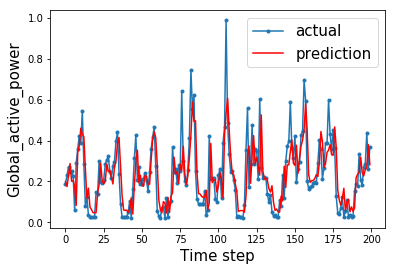

In [7]:
# Comparisson between prediction and modeling

dummyVector = [x for x in range(200)]
plt.plot(dummyVector, yTestInverse[:200], marker='.', label = "actual")
plt.plot(dummyVector, yPredInverse[:200], 'r', label = "prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize = 15)
plt.show()

Train on 8760 samples, validate on 25399 samples
Epoch 1/20
 - 2s - loss: 0.0165 - val_loss: 0.0115
Epoch 2/20
 - 1s - loss: 0.0115 - val_loss: 0.0094
Epoch 3/20
 - 1s - loss: 0.0107 - val_loss: 0.0089
Epoch 4/20
 - 1s - loss: 0.0105 - val_loss: 0.0088
Epoch 5/20
 - 1s - loss: 0.0105 - val_loss: 0.0088
Epoch 6/20
 - 1s - loss: 0.0105 - val_loss: 0.0088
Epoch 7/20
 - 1s - loss: 0.0105 - val_loss: 0.0087
Epoch 8/20
 - 1s - loss: 0.0104 - val_loss: 0.0087
Epoch 9/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 10/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 11/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 12/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 13/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 14/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 15/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 16/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 17/20
 - 1s - loss: 0.0104 - val_loss: 0.0088
Epoch 18/20
 - 1s - loss: 0.0103 - val_loss: 0.0088
Epoch 19/20
 - 1s - loss

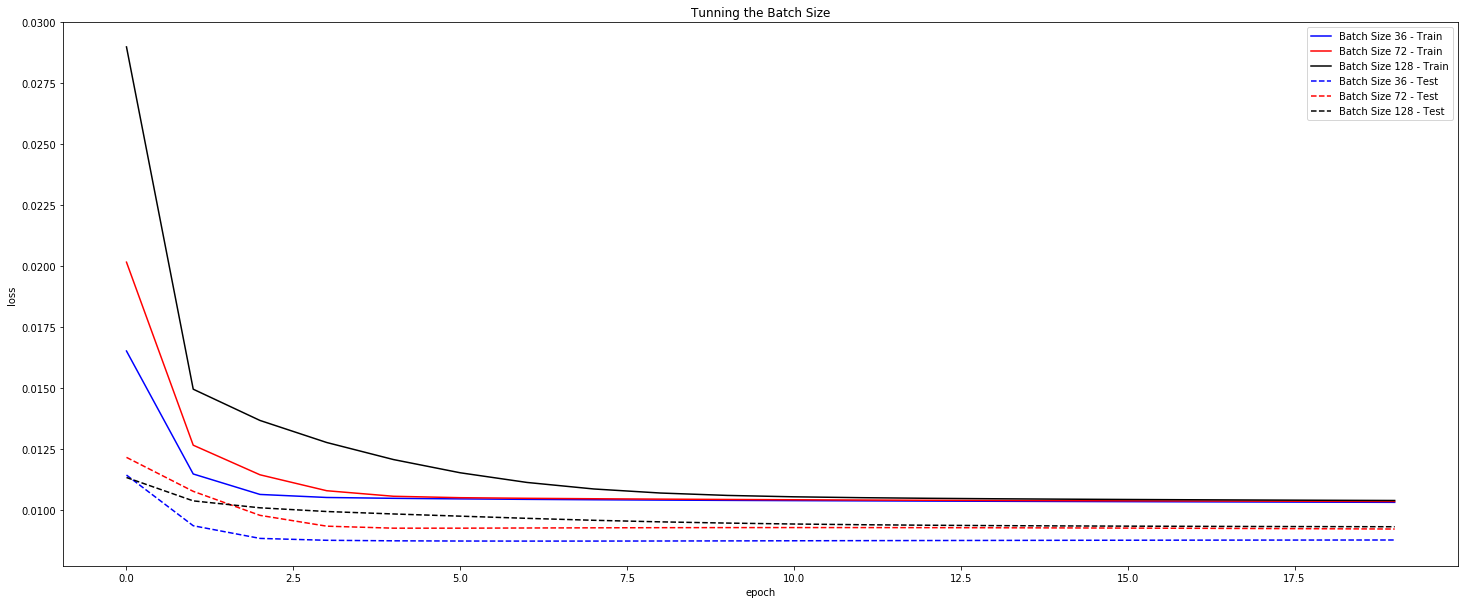

Train on 8760 samples, validate on 25399 samples
Epoch 1/20
 - 2s - loss: 0.0201 - val_loss: 0.0119
Epoch 2/20
 - 1s - loss: 0.0125 - val_loss: 0.0107
Epoch 3/20
 - 1s - loss: 0.0113 - val_loss: 0.0097
Epoch 4/20
 - 1s - loss: 0.0108 - val_loss: 0.0094
Epoch 5/20
 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 6/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 7/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 8/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 9/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 10/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 11/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 12/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 13/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 14/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 15/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 16/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 17/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 18/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 19/20
 - 1s - loss

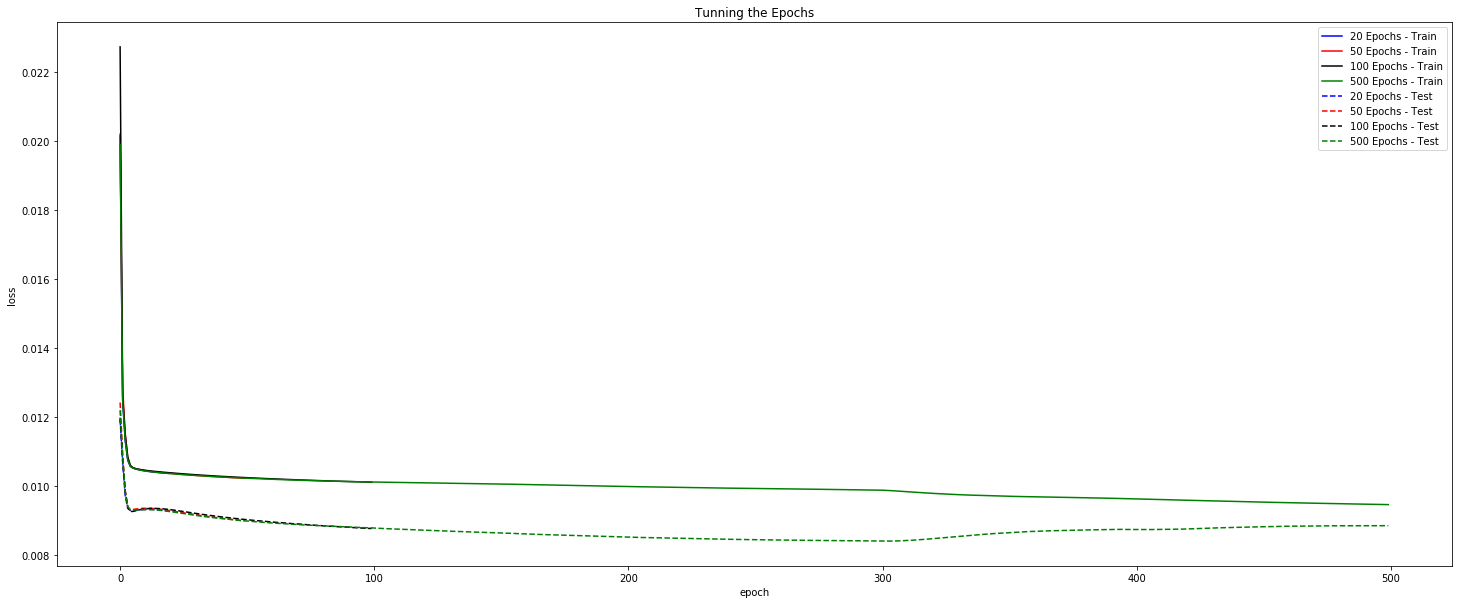

Train on 8760 samples, validate on 25399 samples
Epoch 1/20
 - 3s - loss: 0.0194 - val_loss: 0.0114
Epoch 2/20
 - 1s - loss: 0.0127 - val_loss: 0.0105
Epoch 3/20
 - 1s - loss: 0.0115 - val_loss: 0.0097
Epoch 4/20
 - 1s - loss: 0.0109 - val_loss: 0.0093
Epoch 5/20
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 6/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 7/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 8/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 9/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 10/20
 - 0s - loss: 0.0104 - val_loss: 0.0092
Epoch 11/20
 - 0s - loss: 0.0104 - val_loss: 0.0092
Epoch 12/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 13/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 14/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 15/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 16/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 17/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 18/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 19/20
 - 1s - loss

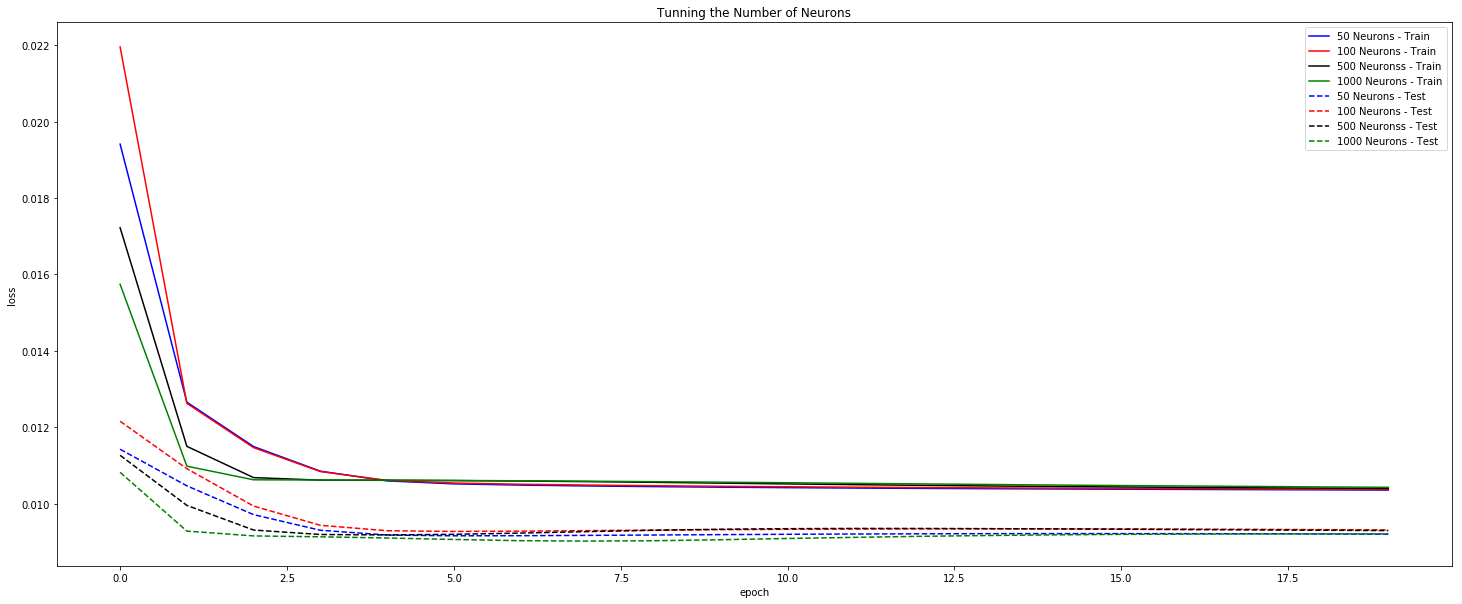

In [12]:
# Hyperparameters Tunning

dropoutIndex = [0.0, 0.1, 0.2]
neuronsLSTMLayer = [50, 100, 500, 1000]
neuronsOutputLayer = 1
lossFunction = 'mean_squared_error'
Optimizer = 'adam'
Epochs = [20, 50, 100, 500]
batchSize = [36, 72, 128]
Verbose = 2

plt.rcParams['figure.figsize'] = 25, 10

class tunningTheBatchSize():
    
    def tunningWithBatchSize36():
        
        modelWithBatchSize36 = Sequential()
        modelWithBatchSize36.add(LSTM(neuronsLSTMLayer[1], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWithBatchSize36.add(Dropout(dropoutIndex[0]))
        modelWithBatchSize36.add(Dense(neuronsOutputLayer))
        modelWithBatchSize36.compile(loss = lossFunction, optimizer = Optimizer)

        historyBatchSize36 = modelWithBatchSize36.fit(xTrain, yTrain, epochs = Epochs[0], batch_size = batchSize[0], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)

        return historyBatchSize36
        
    def tunningWithBatchSize72():
        
        modelWithBatchSize72 = Sequential()
        modelWithBatchSize72.add(LSTM(neuronsLSTMLayer[1], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWithBatchSize72.add(Dropout(dropoutIndex[0]))
        modelWithBatchSize72.add(Dense(neuronsOutputLayer))
        modelWithBatchSize72.compile(loss = lossFunction, optimizer = Optimizer)

        historyBatchSize72 = modelWithBatchSize72.fit(xTrain, yTrain, epochs = Epochs[0], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)

        return historyBatchSize72

    def tunningWithBatchSize128():
        
        modelWithBatchSize128 = Sequential()
        modelWithBatchSize128.add(LSTM(neuronsLSTMLayer[1], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWithBatchSize128.add(Dropout(dropoutIndex[0]))
        modelWithBatchSize128.add(Dense(neuronsOutputLayer))
        modelWithBatchSize128.compile(loss = lossFunction, optimizer = Optimizer)

        historyBatchSize128 = modelWithBatchSize128.fit(xTrain, yTrain, epochs = Epochs[0], batch_size = batchSize[2], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)

        return historyBatchSize128
    
class tunningTheEpochs():
    
    def tunningWith20Epochs():
        
        modelWith20Epochs = Sequential()
        modelWith20Epochs.add(LSTM(neuronsLSTMLayer[1], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWith20Epochs.add(Dropout(dropoutIndex[0]))
        modelWith20Epochs.add(Dense(neuronsOutputLayer))
        modelWith20Epochs.compile(loss = lossFunction, optimizer = Optimizer)

        history20Epochs = modelWith20Epochs.fit(xTrain, yTrain, epochs = Epochs[0], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)

        return history20Epochs
        
    def tunningWith50Epochs():
        
        modelWith50Epochs = Sequential()
        modelWith50Epochs.add(LSTM(neuronsLSTMLayer[1], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWith50Epochs.add(Dropout(dropoutIndex[0]))
        modelWith50Epochs.add(Dense(neuronsOutputLayer))
        modelWith50Epochs.compile(loss = lossFunction, optimizer = Optimizer)

        history50Epochs = modelWith50Epochs.fit(xTrain, yTrain, epochs = Epochs[1], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)

        return history50Epochs
              
    def tunningWith100Epochs():
        
        modelWith100Epochs = Sequential()
        modelWith100Epochs.add(LSTM(neuronsLSTMLayer[1], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWith100Epochs.add(Dropout(dropoutIndex[0]))
        modelWith100Epochs.add(Dense(neuronsOutputLayer))
        modelWith100Epochs.compile(loss = lossFunction, optimizer = Optimizer)

        history100Epochs = modelWith100Epochs.fit(xTrain, yTrain, epochs = Epochs[2], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)

        return history100Epochs

    def tunningWith500Epochs():
        
        modelWith500Epochs = Sequential()
        modelWith500Epochs.add(LSTM(neuronsLSTMLayer[1], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWith500Epochs.add(Dropout(dropoutIndex[0]))
        modelWith500Epochs.add(Dense(neuronsOutputLayer))
        modelWith500Epochs.compile(loss = lossFunction, optimizer = Optimizer)
        
        callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)]
                     
        history500Epochs = modelWith500Epochs.fit(xTrain, yTrain, epochs = Epochs[3], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)
        
        return history500Epochs
        
class tunningTheLSTMNeurons():
    
    def tunningWith50Neurons():
        
        modelWith50Neurons = Sequential()
        modelWith50Neurons.add(LSTM(neuronsLSTMLayer[0], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWith50Neurons.add(Dropout(dropoutIndex[0]))
        modelWith50Neurons.add(Dense(neuronsOutputLayer))
        modelWith50Neurons.compile(loss = lossFunction, optimizer = Optimizer)

        history50Neurons = modelWith50Neurons.fit(xTrain, yTrain, epochs = Epochs[0], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)

        return history50Neurons
    
    def tunningWith100Neurons():
        
        modelWith100Neurons = Sequential()
        modelWith100Neurons.add(LSTM(neuronsLSTMLayer[1], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWith100Neurons.add(Dropout(dropoutIndex[0]))
        modelWith100Neurons.add(Dense(neuronsOutputLayer))
        modelWith100Neurons.compile(loss = lossFunction, optimizer = Optimizer)

        history100Neurons = modelWith100Neurons.fit(xTrain, yTrain, epochs = Epochs[0], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)
        
        return history100Neurons
    
    def tunningWith500Neurons():
        
        modelWith500Neurons = Sequential()
        modelWith500Neurons.add(LSTM(neuronsLSTMLayer[2], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWith500Neurons.add(Dropout(dropoutIndex[0]))
        modelWith500Neurons.add(Dense(neuronsOutputLayer))
        modelWith500Neurons.compile(loss = lossFunction, optimizer = Optimizer)

        callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)]
                     
        history500Neurons = modelWith500Neurons.fit(xTrain, yTrain, epochs = Epochs[0], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)
        
        return history500Neurons
    
    def tunningWith1000Neurons():
        
        modelWith1000Neurons = Sequential()
        modelWith1000Neurons.add(LSTM(neuronsLSTMLayer[3], input_shape = (xTrain.shape[1], xTrain.shape[2])))
        modelWith1000Neurons.add(Dropout(dropoutIndex[0]))
        modelWith1000Neurons.add(Dense(neuronsOutputLayer))
        modelWith1000Neurons.compile(loss = lossFunction, optimizer = Optimizer)

        callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)]
                     
        history1000Neurons = modelWith1000Neurons.fit(xTrain, yTrain, epochs = Epochs[0], batch_size = batchSize[1], validation_data = (xTest, yTest), verbose = Verbose, shuffle=False)
        
        return history1000Neurons

# Plots 

# Batch Size

historyBatchSize36 = tunningTheBatchSize.tunningWithBatchSize36()
historyBatchSize72 = tunningTheBatchSize.tunningWithBatchSize72()
historyBatchSize128 = tunningTheBatchSize.tunningWithBatchSize128()

plt.plot(historyBatchSize36.history['loss'], color = 'b')
plt.plot(historyBatchSize72.history['loss'], color = 'r')
plt.plot(historyBatchSize128.history['loss'], color = 'k')
plt.plot(historyBatchSize36.history['val_loss'], color = 'b', linestyle = '--')
plt.plot(historyBatchSize72.history['val_loss'], color = 'r', linestyle = '--')
plt.plot(historyBatchSize128.history['val_loss'], color = 'k', linestyle = '--')

plt.title('Tunning the Batch Size')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Batch Size 36 - Train', 'Batch Size 72 - Train', 'Batch Size 128 - Train', 'Batch Size 36 - Test', 'Batch Size 72 - Test', 'Batch Size 128 - Test'], loc='upper right')
plt.show()

# Epochs

history20Epochs = tunningTheEpochs.tunningWith20Epochs()
history50Epochs = tunningTheEpochs.tunningWith50Epochs()
history100Epochs = tunningTheEpochs.tunningWith100Epochs()
history500Epochs = tunningTheEpochs.tunningWith500Epochs()

plt.plot(history20Epochs.history['loss'], color = 'b')
plt.plot(history50Epochs.history['loss'], color = 'r')
plt.plot(history100Epochs.history['loss'], color = 'k')
plt.plot(history500Epochs.history['loss'], color = 'g')
plt.plot(history20Epochs.history['val_loss'], color = 'b', linestyle = '--')
plt.plot(history50Epochs.history['val_loss'], color = 'r', linestyle = '--')
plt.plot(history100Epochs.history['val_loss'], color = 'k', linestyle = '--')
plt.plot(history500Epochs.history['val_loss'], color = 'g', linestyle = '--')

plt.title('Tunning the Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['20 Epochs - Train', '50 Epochs - Train', '100 Epochs - Train', '500 Epochs - Train', '20 Epochs - Test', '50 Epochs - Test', '100 Epochs - Test', '500 Epochs - Test'], loc='upper right')
plt.show()

# Number of Neurons

history50Neurons = tunningTheLSTMNeurons.tunningWith50Neurons()
history100Neurons = tunningTheLSTMNeurons.tunningWith100Neurons()
history500Neurons = tunningTheLSTMNeurons.tunningWith500Neurons()
history1000Neurons = tunningTheLSTMNeurons.tunningWith1000Neurons()

plt.plot(history50Neurons.history['loss'], color = 'b')
plt.plot(history100Neurons.history['loss'], color = 'r')
plt.plot(history500Neurons.history['loss'], color = 'k')
plt.plot(history1000Neurons.history['loss'], color = 'g')
plt.plot(history50Neurons.history['val_loss'], color = 'b', linestyle = '--')
plt.plot(history100Neurons.history['val_loss'], color = 'r', linestyle = '--')
plt.plot(history500Neurons.history['val_loss'], color = 'k', linestyle = '--')
plt.plot(history1000Neurons.history['val_loss'], color = 'g', linestyle = '--')

plt.title('Tunning the Number of Neurons')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['50 Neurons - Train', '100 Neurons - Train', '500 Neuronss - Train', '1000 Neurons - Train', '50 Neurons - Test', '100 Neurons - Test', '500 Neuronss - Test', '1000 Neurons - Test'], loc='upper right')
plt.show()